# Food Claims Process

Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast-food establishments, customers make claims against the company. For example, they Blame Vivendo for suspected food poisoning.

The legal team, that processes these claims, is currently split across four locations. The new head of the legal department wants to know if there are differences in the time it takes to close claims across the locations.

## Exploratory analysis and Data Validation

Here, the data will be imported and perform some exploratory analysis as data cleaning as necessary. 

In [1]:
#Packages for data handling:
import pandas as pd
import numpy as np

#Packages for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Upload the dataframe
df = pd.read_csv('datasets/food_claims_2212.csv')

#Displaying the whole df:
display(df)
print('\n')

#Display the information for each column of the df:
print('Dataframe info:')
print(df.info())
print('\n')

#Display the number of NaN values for each column:
print('Total number of NaN values per column:')
print(df.isna().sum())
print('\n')

#Display the unique values of each column:
print('Total of unique values per column:')
print(df.nunique())

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat




Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB
None


Total number of NaN values per column:
claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


Total of unique values pe

The dataframe has 2000 rows and 8 columns. So for each column, I have:

claim_id: this column has 2000 unique and non null values.

time_to_close: this column has 2000 rows with no missing values.

claim_amount: this column has 2000 non null values. The column was classified as object type, which must be changed to float type. After a close inspection, it was verified that each row had 'R$ ' before the amount claimed. It is required to remove before changing the data type.

amount_paid: this column has 36 null values. The missing values were replaced by the column median, as indicated.

location: this column has 2000 non null values, no missing values, and 4 unique values.

individuals_on_claim: this column has 2000 non null values with no missing values.

linked_cases: this column has 26 null values. The null values will the changed to False, as indicated. Afterward, this column data type will be changed from object to boolean. The column has only 2 unique values, as expected.

cause: this column has 2000 rows non null values with no missing values. This column was expected to have only 3 unique values and was verified it has 5 instead. A quick look into the unique values allowed us to correct them by changing all letters to lowercase, stripping unnecessary spacing and replacing the plural with the singular.

In [3]:
#Remove unecessary information from the rows:
df['claim_amount']=df['claim_amount'].apply(lambda x: x.replace('R$ ',''))

#Filling the NaN values:
df['amount_paid']=df['amount_paid'].fillna(df['amount_paid'].median())
df['linked_cases']=df['linked_cases'].replace('','False')


#Correct the data types:
df['claim_amount']=df['claim_amount'].astype('float')
df['linked_cases']=df['linked_cases'].astype('bool')


#Cleaning the column to allow a better data handling when this column will be used:
df['cause']=df['cause'].str.lower()
df['cause']=df['cause'].str.strip()
df['cause']=df['cause'].replace('vegetables', 'vegetable')


#Confirmations:
#Display the information for each column of the df to confirm the changed made:
print('Dataframe info:')
print(df.info())
print('\n')

#Check the unique values of each column:
print('Total of unique values per column:')
print(df.select_dtypes(['int','object', 'bool']).nunique())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB
None


Total of unique values per column:
claim_id                2000
time_to_close            256
location                   4
individuals_on_claim      15
linked_cases               2
cause                      3
dtype: int64


## How does the number of claims differ across locations?

The number of claims can be visualized using a countplot for each location. Adding to that, the respective percentage of claims for each location can be calculated.

Text(0, 0.5, 'Count')

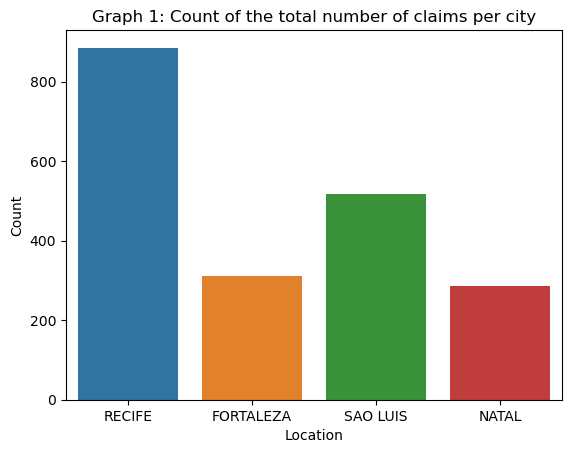

In [4]:
sns.countplot(x=df['location']).set(title=('Graph 1: Count of the total number of claims per city'))
plt.xlabel('Location')
plt.ylabel('Count')

In [5]:
percentage =(df['location'].value_counts()/len(df['location']))*100
percentage

location
RECIFE       44.25
SAO LUIS     25.85
FORTALEZA    15.55
NATAL        14.35
Name: count, dtype: float64

From Graph 1, it is possible to see that number of claims is higher at Recife, with 44.25 % of the total claims. The data is well distributed for all locations, even though Recife has most of the total claims.

## What is the distribution of time to close claims?

The distribution of time to close claims can be achieved by using a histogram and evaluating its skewness.

Text(0, 0.5, 'Count')

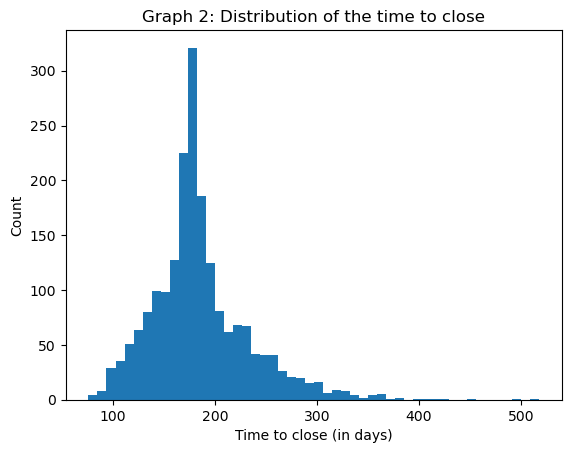

In [6]:
plt.hist(df['time_to_close'], bins=50)
plt.title('Graph 2: Distribution of the time to close')
plt.xlabel('Time to close (in days)')
plt.ylabel('Count')

From Graph 2, it is possible to see that the time to close for all claims seems to be a right-skewed distribution, with most cases being closed after 190 days. However, some cases were closed after more than 300 days, which indicates the possible existence of outliers in the data. Further analysis would be required to understand these outliers and decide if these values should be kept to obtain more insights regarding the time needed to close food poisoning claims.

## How does the average time to close claims differ by location?

This question can be answered by plotting a boxplot for each location and compare the respective median value as the interquartile range.

Text(0, 0.5, 'Time to close (in days)')

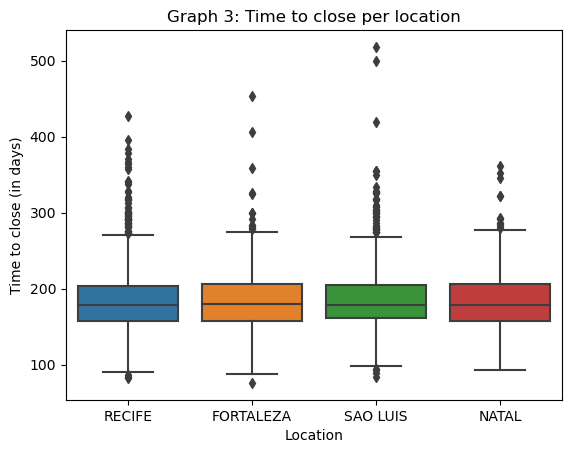

In [7]:
sns.boxplot(x='location', y='time_to_close',data=df)
plt.title('Graph 3: Time to close per location')
plt.xlabel('Location')
plt.ylabel('Time to close (in days)')

Graph 3 represents the time to close the claim for each location. The results seemed very similar between each city, as seen from the median value, and the interquartile range for each city is identical. However, a better evaluation to know which city has the lowest time to close would require the removal of part of the outliers so it would be possible to have a better visualization, which could help to see the differences between each city.